# Bayesian Machine Learning

### Preliminaries

- Goals
  - Introduction to Bayesian (i.e., probabilistic) modeling
- Materials
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 68-74 (on the coin toss example)
    - [Ariel Caticha - 2012 - Entropic Inference and the Foundations of Physics](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.35-44 (section 2.9, on deriving Bayes rule for updating probabilities)
    <!--- - [David Blei - 2014 - Build, Compute, Critique, Repeat: Data Analysis with Latent Variable Models](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Blei-2014-Build-Compute-Critique-Repeat.pdf), on the _Build-Compute-Critique-Repeat_ design model. --->

### Challenge: Predicting a Coin Toss

- **Problem**: We observe a the following sequence of heads (h) and tails (t) when tossing the same coin repeatedly $$D=\{hthhtth\}\,.$$

- What is the probability that heads comes up next?

- **Solution**: later in this lecture. 

### The Bayesian Machine Learning Framework

- Suppose that your application is to predict a future observation $x$, based on $N$ past observations $D=\{x_1,\dotsc,x_N\}$.

- The Bayesian design approach to solving this task involves four stages: 

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "red">REPEAT</font></br>
&nbsp; 1- Model specification</br>
&nbsp; 2- Parameter estimation</br>
&nbsp; 3- Model evaluation</br>
<font color = "red">UNTIL model performance is satisfactory</font></br>
&nbsp; 4- Apply model
</div>

- In principle, based on the model evaluation results, you may want to re-specify your model and _repeat_ the design process (a few times), until model performance is acceptable. 

  
- Next, we discuss these four stages in a bit more detail.

### (1) Model specification

- Your first task is to propose a probabilistic model ($m$) for generating the observations $x$.

- A probabilistic model $m$ consists of a joint distribution $p(x,\theta|m)$ that relates observations $x$ to model parameters $\theta$. Usually, the model is proposed in the form of a data generating  distribution $p(x|\theta,m)$ and a prior $p(\theta|m)$. 

- _You_ are responsible to choose the data generating distribution $p(x|\theta)$ based on your physical understanding of the data generating process. (For brevity, since we are working on one given model $m$, we drop the given dependency on $m$ from the notation).

- _You_ must also choose the prior $p(\theta)$ to reflect what you know about the parameter values before you see the data $D$.
  

### (2) Parameter estimation

- Note that, for a given data set $D=\{x_1,x_2,\dots,x_N\}$ with _independent_ observations $x_n$, the likelihood factorizes as 
$$ p(D|\theta) = \prod_{n=1}^N p(x_n|\theta)\,,$$
so usually you select a model for generating one observation $x_n$ and then use (in-)dependence assumptions to combine these models into a likelihood function for the model parameters.

- The likelihood and prior both contain information about the model parameters. Next, you use Bayes rule to fuse these two information sources into a posterior distribution for the parameters:
$$
\underbrace{p(\theta|D) }_{\text{posterior}} = \frac{p(D|\theta) p(\theta)}{p(D)} \propto \underbrace{p(D|\theta)}_{\text{likelihood}} \cdot \underbrace{p(\theta)}_{\text{prior}}
$$  

- Note that there's **no need for you to design some clever parameter estimation algorithm**. Bayes rule _is_ the parameter estimation algorithm. The only complexity lies in the computational issues! 

- This "recipe" works only if the right-hand side (RHS) factors can be evaluated; the computational details can be quite challenging and this is what machine learning is about.     
  
- $\Rightarrow$ **Machine learning is EASY, apart from computational details :)**
  

###  (3) Model Evaluation 

- In the framework above, parameter estimation was executed by "perfect" Bayesian reasoning. So is everything settled now? 

- No, there appears to be one remaining problem: how good really were our model assumptions $p(x|\theta)$ and $p(\theta)$? We want to "score" the model performance.

- Note that this question is only interesting in practice if we have alternative models to choose from. After all, if you don't have an alternative model, any value for the model evidence would still not lead you to switch to another model.  

- Let's assume that we have more candidate models, say $\mathcal{M} = \{m_1,\ldots,m_K\}$ where each model relates to specific prior $p(\theta|m_k)$ and likelihood $p(D|\theta,m_k)$? Can we evaluate the relative performance of a model against another model from the set?

- Start again with **model specification**. _You_ must now specify a prior $p(m_k)$ (next to the likelihood $p(D|\theta,m_k)$ and prior $p(\theta|m_k)$) for each of the models and then solve the desired inference problem:      
$$\begin{align*} 
\underbrace{p(m_k|D)}_{\substack{\text{model}\\\text{posterior}}} &= \frac{p(D|m_k) p(m_k)}{p(D)} \\
  &\propto p(m_k) \cdot p(D|m_k) \\
  &= p(m_k)\cdot \int_\theta p(D,\theta|m_k) \,\mathrm{d}\theta\\
  &= \underbrace{p(m_k)}_{\substack{\text{model}\\\text{prior}}}\cdot \underbrace{\int_\theta \underbrace{p(D|\theta,m_k)}_{\text{likelihood}} \,\underbrace{p(\theta|m_k)}_{\text{prior}}\, \mathrm{d}\theta }_{\substack{\text{evidence }p(D|m_k)\\\text{= model likelihood}}}\\
\end{align*}$$


- Note that, to evaluate the posterior for a model, you must calculate the "evidence", which can be interpreted as a likelihood function for the model. 

- You can now compare posterior distributions $p(m_k|D)$ for a set of models $\{m_k\}$ and decide on the merits of each model relative to alternative models. This procedure is called **Bayesian model comparison**.

- $\Rightarrow$ In a Bayesian framework, **model estimation** follows the same recipe as parameter estimation; it just works at one higher hierarchical level. Compare the required calulations:

$$\begin{align*}
p(\theta|D) &\propto p(D|\theta) p(\theta) \; &&\text{(parameter estimation)} \\
p(m_k|D) &\propto p(D|m_k) p(m_k) \; &&\text{(model comparison)}
\end{align*}$$

- Again, **no need to invent a special algorithm for estimating the performance of your model**. Straightforward application of probability theory takes care of all that. 

- In principle, you could proceed with asking how good your choice for the candidate model set $\mathcal{M}$ was. You would have to provide a set of alternative model sets $\{\mathcal{M}_1,\mathcal{M}_2,\ldots,\mathcal{M}_M\}$ with priors $p(\mathcal{M}_m)$ for each set and compute posteriors $p(\mathcal{M}_m|D)$. And so forth ...  

- With the (relative) performance evaluation scores of your model in hand, you could now re-specify your model (hopefully an improved model) and _repeat_ the design process until the model performance score is acceptable. 

- As an aside, in the (statistics and machine learning) literature, performance comparison between two models is often reported by the [Bayes Factor](https://en.wikipedia.org/wiki/Bayes_factor), which is defined as the ratio of model evidences: 
$$\begin{align*}
\underbrace{\frac{p(D|m_1)}{p(D|m_2)}}_{\text{Bayes Factor}} &= \frac{\frac{p(D,m_1)}{p(m_1)}}{\frac{p(D,m_2)}{p(m_2)}}  \\
&= \frac{p(D,m_1)}{p(m_1)} \cdot \frac{p(m_2)}{p(D,m_2)} \\
&= \frac{p(m_1|D) p(D)}{p(m_1)} \cdot \frac{p(m_2)}{p(m_2|D) p(D)} \\
&= \underbrace{\frac{p(m_1|D)}{p(m_2|D)}}_{\substack{\text{posterior} \\ \text{ratio}}} \cdot \underbrace{\frac{p(m_2)}{p(m_1)}}_{\substack{\text{prior} \\ \text{ratio}}}
\end{align*}$$
  - Hence, for equal model priors ($p(m_1)=p(m_2)=0.5$), the Bayes Factor reports the posterior probability ratio for the two models. 

- In principle, any decision about which is the better model has accepted some ad hocery, but [Jeffreys (1961)](https://www.amazon.com/Theory-Probability-Classic-Physical-Sciences/dp/0198503687/ref=sr_1_1?qid=1663516628&refinements=p_27%3Athe+late+Harold+Jeffreys&s=books&sr=1-1&text=the+late+Harold+Jeffreys) advises the following interpretation of the log-Bayes factor $log_{10} B_{12} =\log_{10}\frac{p(D|m_1)}{p(D|m_2)}$:

<table width="60%" align="center" text-align="center">
<tr><td> $\log_{10} B_{12}$</td><td > <b>Evidence for $m_1$ </b></td></tr>
<tr><td>0 to 0.5</td><td>not worth mentioning</td></tr>
<tr><td>0.5 to 1</td><td>substantial</td></tr>
<tr><td>1 to 2</td><td>strong</td></tr>
<tr><td> >2</td><td>decisive</td></tr>
</table> 

### (4) Prediction

- Once we are satisfied with the evidence for a (trained) model, we can apply the model to our prediction/classification/etc task.

- Given the data $D$, our knowledge about the yet unobserved datum $x$ is captured by (everything is conditioned on the selected model)
$$\begin{align*}
p(x|D) &\stackrel{s}{=} \int p(x,\theta|D) \,\mathrm{d}\theta\\
 &\stackrel{p}{=} \int p(x|\theta,D) p(\theta|D) \,\mathrm{d}\theta\\
 &\stackrel{m}{=} \int \underbrace{p(x|\theta)}_{\text{data generation dist.}} \cdot \underbrace{p(\theta|D)}_{\text{posterior}} \,\mathrm{d}\theta\\
\end{align*}$$

- In the last equation, the simplification $p(x|\theta,D) = p(x|\theta)$ follows from our model specification. We assumed a _parametric_ data generating distribution $p(x|\theta)$ with no explicit dependency on the data set $D$. 

- Again, **no need to invent a special prediction algorithm**. Probability theory takes care of all that. The complexity of prediction is just computational: how to carry out the marginalization over $\theta$.

- Note that the application of the learned posterior $p(\theta|D)$ not necessarily has to be a prediction task. We use it here as an example, but other applications (e.g., classification, regression etc.) are of course also possible. 
  

##### Prediction with multiple models

- When you have a posterior $p(m_k|D)$ for the models, you don't *need* to choose one model for the prediction task. You can do prediction by **Bayesian model averaging**, which combines the predictive power from all models:
$$\begin{align*}
p(x|D) &= \sum_k \int p(x,\theta,m_k|D)\,\mathrm{d}\theta \\
 &= \sum_k \int  p(x|\theta,m_k) \,p(\theta|m_k,D)\, p(m_k|D) \,\mathrm{d}\theta \\
  &= \sum_k \underbrace{p(m_k|D)}_{\substack{\text{model}\\\text{posterior}}} \cdot \int \underbrace{p(\theta|m_k,D)}_{\substack{\text{parameter}\\\text{posterior}}} \, \underbrace{p(x|\theta,m_k)}_{\substack{\text{data generating}\\\text{distribution}}} \,\mathrm{d}\theta
\end{align*}$$ 

- Alternatively, if you do need to work with one model (e.g. due to computational resource constraints), you can for instance select the model with largest posterior $p(m_k|D)$ and use that model for prediction. This is called **Bayesian model selection**.


- Bayesian model averaging is the principal way to apply PT to machine learning. You don't throw away information by discarding lesser performant models, but rather use PT (marginalization of models) to compute $$p(\text{what-I-am-interested-in} \,|\, \text{all available information})$$ exactly. 

### We're Done!

- In principle, you now have the recipe in your hands now to solve all your prediction/classification/regression etc problems by the same method:

  1. specify a model
  2. train the model (by PT)
  3. evaluate the model (by PT); if not satisfied, goto 1
  4. apply the model (by PT)

- Crucially, there is no need to invent clever machine learning algorithms, and there is no need to invent a clever prediction algorithm nor a need to invent a model performance criterion. Instead, you propose a model and, from there on, you let PT reason about everything that you care about. 

- Your problems are only of computational nature. Perhaps the integral to compute the evidence may not be analytically tractable, etc.

### Bayesian Evidence as a Model Performance Criterion

- I'd like to convince you that <a id="Bayesian-model-evidence">Bayesian model evidence</a> is an excellent criterion for assessing your model's performance. To do so, let us consider a decomposition that relates model evidence to other highly-valued criteria such as **accuracy** and **model complexity**.

- Consider a model $p(x,\theta|m)$ and a data set $D = \{x_1,x_2, \ldots,x_N\}$.

- Given the data set $D$, the log-evidence for model $m$ decomposes as follows (please check the derivation):

$$\begin{align*}
\underbrace{\log p(D|m)}_{\text{log-evidence}} &= \log p(D|m) \cdot   \underbrace{\int p(\theta|D,m)\mathrm{d}\theta}_{\text{evaluates to }1} \\
 &= \int p(\theta|D,m) \log p(D|m) \mathrm{d}\theta  \qquad \text{(move $\log p(D|m)$ into the integral)} \\
 &= \int p(\theta|D,m) \log \underbrace{\frac{p(D|\theta,m) p(\theta|m)}{p(\theta|D,m)}}_{\text{by Bayes rule}} \mathrm{d}\theta \\
  &= \underbrace{\int p(\theta|D,m) \log p(D|\theta,m) \mathrm{d}\theta}_{\text{accuracy (a.k.a. data fit)}} - \underbrace{\int p(\theta|D,m) \log  \frac{p(\theta|D,m)}{p(\theta|m)} \mathrm{d}\theta}_{\text{complexity}}
\end{align*}$$

- The first term (data fit, also known as accuracy) measures how well the model predicts the data set $D$ (as measured by $\log p(D|\theta,m)$), after having learned from the data (because we marginalize $\theta$ with the posterior $p(\theta|D,m)$). We want this term to be large (although only focussing on this term could lead to *overfitting*).

- The second term (complexity) quantifies the amount of information that the model absorbed through learning, i.e., by moving parameter beliefs from $p(\theta|m)$ to $p(\theta|D,m)$. Technically, this term is the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between posterior and prior. The KL divergence is always $\geq 0$ and only equals $0$ if the posterior is equal to the prior. We want this term to be small.  

- The complexity term regularizes the Bayesian learning process automatically. If you prefer models with high Bayesian evidence, then you prefer models that get a good data fit without need to learn much from the data set. These types of models are said to *generalize* well, since they can be applied to different data sets without specific adaptations for each data set. 

- $\Rightarrow$ Bayesian learning automatically leads to models that generalize well. **There is no need for early stopping or validation data sets**. Just learn on the full data set and all behaves well.  

### Bayesian Machine Learning and the Scientific Method Revisited

- The Bayesian design process provides a unified framework for the Scientific Inquiry method. We can now add equations to the design loop. (Trial design to be discussed in [Intelligent Agent lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Intelligent-Agents-and-Active-Inference.ipynb).) 

<p style="text-align:center;"><img src="./figures/scientific-inquiry-loop-w-BML-eqs.png" width="600px"></p>


### Now Solve the Example Problem: Predicting a Coin Toss

- We observe a the following sequence of heads ($h$) and tails ($t$) when tossing the same coin repeatedly $$D=\{hthhtth\}\,.$$

- What is the probability that heads comes up next? We solve this in the next slides ...

### Coin toss example (1): Model Specification

- We observe a sequence of $N$ coin tosses $D=\{x_1,\ldots,x_N\}$ with $n$ heads. 

- Let us denote outcomes by 
$$x_k = \begin{cases} h & \text{if heads comes up} \\
  t & \text{if tails} \end{cases}
  $$

##### Likelihood

- Assume a [**Bernoulli** distributed](https://en.wikipedia.org/wiki/Bernoulli_distribution) variable $p(x_k=h|\mu)=\mu$ for a single coin toss, leading to 
$$p(x_k|\mu)=\mu^{x_k} (1-\mu)^{1-x_k} \,.$$

- Assume $n$ times heads were thrown out of a total of $N$ throws. The likelihood function then follows a a [**binomial** distribution](https://en.wikipedia.org/wiki/Binomial_distribution) :
$$   
p(D|\mu) = \prod_{k=1}^N p(x_k|\mu) = \mu^n (1-\mu)^{N-n}
$$

##### <a id="beta-prior">Prior</a>

-  Assume the prior beliefs for $\mu$ are governed by a [**beta distribution**](https://en.wikipedia.org/wiki/Beta_distribution)

$$
p(\mu) = \mathrm{Beta}(\mu|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1}(1-\mu)^{\beta-1}
$$
where the Gamma function is sort of a generalized factorial function. In particular, if $\alpha,\beta$ are integers, then $$\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)(\Gamma(\beta)} = \frac{(\alpha+\beta-1)!}{(\alpha-1)!\,(\beta-1)!}$$


- A _what_ distribution? Yes, the **beta distribution** is a **conjugate prior** for the binomial distribution, which means that 
$$
\underbrace{\text{beta}}_{\text{posterior}} \propto \underbrace{\text{binomial}}_{\text{likelihood}} \times \underbrace{\text{beta}}_{\text{prior}}
$$
so we get a closed-form posterior.

- $\alpha$ and $\beta$ are called **hyperparameters**, since they parameterize the distribution for another parameter ($\mu$). E.g., $\alpha=\beta=1$ (uniform).
  

<img src="./figures/B-fig-2.2.png" width="600px">

- (Bishop Fig.2.2). Plots of the beta distribution $\mathrm{Beta}(\mu|a, b)$ as a function of $\mu$ for various values of the hyperparameters $a$ and $b$.

### Coin toss example (2): Parameter estimation

- Infer posterior PDF over $\mu$ (and evidence) through Bayes rule

$$\begin{align*}
p(\mu&|D) \cdot p(D) = p(D|\mu)\cdot p(\mu)  \\
  &=  \left[ \mu^n (1-\mu)^{N-n}\right] \cdot \left[ \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1}(1-\mu)^{\beta-1} \right] \\
  &= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{n+\alpha-1} (1-\mu)^{N-n+\beta-1} \\
        &= \underbrace{\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(n+\alpha) \Gamma(N-n+\beta)}{\Gamma(N+\alpha+\beta)}}_{\text{evidence }p(D)} \cdot \left[ \underbrace{\frac{\Gamma(N+\alpha+\beta)}{\Gamma(n+\alpha)\Gamma(N-n+\beta)} \mu^{n+\alpha-1} (1-\mu)^{N-n+\beta-1}}_{\text{posterior }p(\mu|D)=\mathrm{Beta}(\mu|n+\alpha, N-n+\beta)}\right]
\end{align*}$$


hence the posterior is also beta-distributed as

$$
p(\mu|D) = \mathrm{Beta}(\mu|\,n+\alpha, N-n+\beta)
$$



### Coin toss example (3): Model Evaluation

- It follow from the above calculation that the evidence for model $m$ can be analytically expressed as

$$
p(D|m) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(n+\alpha) \Gamma(N-n+\beta)}{\Gamma(N+\alpha+\beta)}
$$

- The model evidence is a scalar. The absolute value is not important. However, you may want to compare the model evidence of this model to the evidence for another model on the same data set.  

### Coin Toss Example (4): Prediction

- Once we have accepted a model, let's apply it to the application, in this case, predicting future observations. 

- Marginalize over the parameter posterior to get the predictive PDF for a new coin toss $x_\bullet$, given the data $D$,

$$\begin{align*}
p(x_\bullet=h|D)  &= \int_0^1 p(x_\bullet=h|\mu)\,p(\mu|D) \,\mathrm{d}\mu \\
  &= \int_0^1 \mu \times  \mathrm{Beta}(\mu|\,n+\alpha, N-n+\beta) \,\mathrm{d}\mu  \\
  &= \frac{n+\alpha}{N+\alpha+\beta}
\end{align*}$$

- This result is known as [**Laplace's rule of succession**](https://en.wikipedia.org/wiki/Rule_of_succession).

- The above integral computes the mean of a beta distribution, which is given by $\mathbb{E}[x] = \frac{a}{a+b}$ for $x \sim \mathrm{Beta}(a,b)$, see [wikipedia](https://en.wikipedia.org/wiki/Beta_distribution).

- Finally, we're ready to solve our example problem: for $D=\{hthhtth\}$ and uniform prior ($\alpha=\beta=1$), we get

$$ p(x_\bullet=h|D)=\frac{n+1}{N+2} = \frac{4+1}{7+2} = \frac{5}{9}$$
 

### Coin Toss Example: What did we learn?

- What did we learn from the data? Before seeing any data, we think that $$p(x_\bullet=h)=\left. p(x_\bullet=h|D) \right|_{n=N=0} = \frac{\alpha}{\alpha + \beta}\,.$$ 

- Hence, $\alpha$ and $\beta$ are prior pseudo-counts for heads and tails respectively. 

- After the $N$ coin tosses, we think that $p(x_\bullet=h|D) = \frac{n+\alpha}{N+\alpha+\beta}$.

- Note the following decomposition

$$\begin{align*}
    p(x_\bullet=h|\,D) &= \frac{n+\alpha}{N+\alpha+\beta} = \frac{n}{N+\alpha+\beta} + \frac{\alpha}{N+\alpha+\beta} \\
        &= \frac{N}{N+\alpha+\beta}\cdot \frac{n}{N} + \frac{\alpha+\beta}{N+\alpha+\beta} \cdot \frac{\alpha}{\alpha+\beta} \\
        &= \underbrace{\frac{\alpha}{\alpha+\beta}}_{\substack{\text{prior}\\\text{prediction}}} + \underbrace{\underbrace{\frac{N}{N+\alpha+\beta}}_{\text{gain}}\cdot \underbrace{\big( \underbrace{\frac{n}{N}}_{\substack{\text{data-based}\\\text{prediction}}} - \underbrace{\frac{\alpha}{\alpha+\beta}}_{\substack{\text{prior}\\\text{prediction}}} \big)}_{\text{prediction error}}}_{\text{correction}}
\end{align*}$$

- Note that, since $0\leq \underbrace{\frac{N}{N+\alpha+\beta}}_{\text{gain}} \lt 1$, the Bayesian prediction lies between (fuses) the prior and data-based predictions. The data plays the role of "correcting" the prior prediction.

- For large $N$, the gain goes to $1$ and $\left. p(x_\bullet=h|D)\right|_{N\rightarrow \infty} \rightarrow \frac{n}{N}$ goes to the data-based prediction (the observed relative frequency).

### Code Example: Bayesian evolution for the coin toss


- Next, we code an example for a sequence of coin tosses, where we assume that the true coin generates data $x_n \in \{0,1\}$ by a Bernoulli distribution:
$$
p(x_n|\mu=0.4)=0.4^{x_n} \cdot 0.6^{1-x_n}
$$

- So, this coin is biased!

- In order predict the outcomes of future coin tosses, we'll compare three models.

- All models have the same data generating distribution (also Bernoulli)
$$
p(x_n|\mu,m_1) = p(x_n|\mu,m_2) = \mu^{x_n} (1-\mu)^{1-x_n}
$$
but they have different priors:
$$\begin{aligned}
p(\mu|m_1) &= \mathrm{Beta}(\mu|\alpha=1,\beta=5) \\
p(\mu|m_2) &= \mathrm{Beta}(\mu|\alpha=5,\beta=1) \\
p(\mu|m_3) &= \mathrm{Beta}(\mu|\alpha=8,\beta=13)
\end{aligned}$$

- For each model, we will report as a function of the total number of coin tosses, the posteriors 
$$p(\mu|D,m_\bullet) \,,
$$
and the log-evidence in decibels
$$
\log_{10}  p(D|m_\bullet) \,.
$$

In [1]:

using Distributions, StatsPlots, SpecialFunctions

# computes log10 of Gamma function
function log10gamma(num)
    return log10(gamma(num))
end


# specify model parameter
μ  = 0.4;


ntosses = 200                   # specify number of coin tosses
samples = rand(ntosses) .<= μ   # Flip 200 coins

function handle_coin_toss(prior :: Beta, observation :: Bool)
    posterior = Beta(prior.α + observation, prior.β + (1 - observation))
    return posterior
end

function log_evidence_prior(prior :: Beta, N :: Int64, n :: Int64)
    log_evidence = log10gamma(prior.α + prior.β) - log10gamma(prior.α) - log10gamma(prior.β) + log10gamma(n+prior.α) + log10gamma((N-n)+prior.β) - log10gamma(N+prior.α+prior.β)
    return log_evidence
end

priors = [Beta(1., 5.), Beta(5., 1.), Beta(8, 13)]  #specify prior distributions (you can add additional beta distributions here) model 3 is the "best" prior. Can you see why?
log_e_priors = priors                               #save prior distributions to compute log-evidence

posterior_distributions = [[d] for d in priors]     #save a sequence of posterior distributions for every prior, starting with the prior itself
evidences = [[] for _ in priors]                    #maintain a vector of log evidences to plot later

for (N, sample) in enumerate(samples)                                               #for every sample we want to update our posterior
    for (i, prior) in enumerate(priors)                                             #at every sample we want to update all distributions
        posterior = handle_coin_toss(prior, sample)                                 #do bayesian updating
        push!(posterior_distributions[i], posterior)                                #add posterior to vector of posterior distributions
        log_evidence = log_evidence_prior(log_e_priors[i], N, sum(samples[1:N]))    #compute log evidence and add to vector
        push!(evidences[i], log_evidence)
        priors[i] = posterior                                                       #the prior for the next sample is the posterior from the current sample
    end
end



┌ Info: Saved animation to 
│   fn = /Users/wnuijten/Documents/biaslab/5SSD0 - BMLIP/BMLIP/lessons/notebooks/anim_bay_ct.gif
└ @ Plots /Users/wnuijten/.julia/packages/Plots/4UTBj/src/animation.jl:154


Plots.AnimatedGif("/Users/wnuijten/Documents/biaslab/5SSD0 - BMLIP/BMLIP/lessons/notebooks/anim_bay_ct.gif")
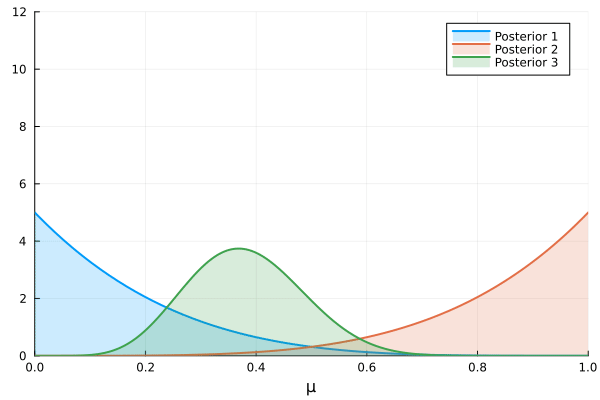

In [2]:
#animate posterior distributions over time in a gif

anim = @animate for i in 1:length(posterior_distributions[1])
    p = plot()
    for j in 1:length(posterior_distributions)
        plot!(posterior_distributions[j][i], xlims = (0, 1), fill=(0, .2,), label=string("Posterior ", j), linewidth=2, ylims=(0,12), xlabel="μ")
    end
end

gif(anim, "anim_bay_ct.gif")

This is an animation. If you are viewing these notes in PDF format you can see the animation at https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Bayesian-Machine-Learning.ipynb

$\Rightarrow$ With more data, the relevance of the prior diminishes!

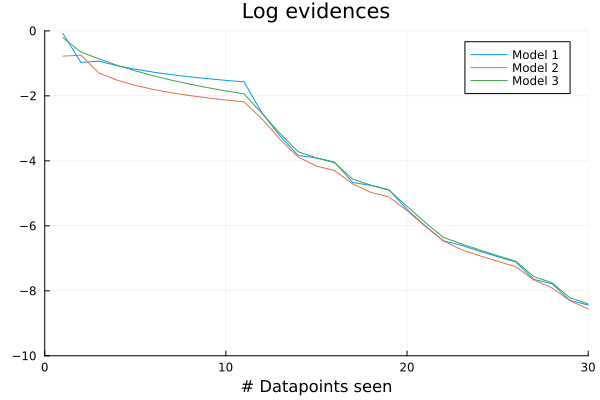

In [3]:
#visualize the first 30 log-evidences of models over time

range = collect(1:length(samples))
labels = reshape([string("Model ", i) for i in 1:length(evidences)], (1, length(evidences)))

plot(range, evidences, label=labels, title="Log evidences", xlims=(0,30), ylims=(-10, 0), xlabel="# Datapoints seen")

Over time, the log-evidences of our models converge to the same value. Can you explain this behaviour?

### From Posterior to Point-Estimate

- In the example above, Bayesian parameter estimation and prediction were tractable in closed-form. This is often not the case. We will need to approximate some of the computations. 


- Recall Bayesian prediction

$$
p(x|D) = \int p(x|\theta)p(\theta|D)\,\mathrm{d}{\theta}
$$

- If we approximate posterior $p(\theta|D)$ by a delta function for one 'best' value $\hat\theta$, then the predictive distribution collapses to

$$
p(x|D)= \int p(x|\theta)\,\delta(\theta-\hat\theta)\,\mathrm{d}{\theta} = p(x|\hat\theta)
$$

- This is just the data generating distribution $p(x|\theta)$ evaluated at $\theta=\hat\theta$, which is easy to evaluate.


- The next question is how to get the parameter estimate $\hat{\theta}$? (See next slide).

### Some Well-known Point-Estimates

- **Bayes estimate** (the mean of the posterior)

$$
\hat \theta_{bayes}  = \int \theta \, p\left( \theta |D \right)
\,\mathrm{d}{\theta}
$$
 

- **Maximum A Posteriori** (MAP) estimate 
$$
\hat \theta_{\text{map}}=  \arg\max _{\theta} p\left( \theta |D \right) =
\arg \max_{\theta}  p\left(D |\theta \right) \, p\left(\theta \right)
$$

- **Maximum Likelihood** (ML) estimate
$$
\hat \theta_{ml}  = \arg \max_{\theta}  p\left(D |\theta\right)
$$
  - Note that Maximum Likelihood is MAP with uniform prior
  - ML is the most common approximation to the full Bayesian posterior.

### Bayesian vs Maximum Likelihood Learning

Consider the task: predict a datum $x$ from an observed data set $D$.

<table>
<tr><td></td><td style="text-align:center"> <b>Bayesian</b></td><td style="text-align:center"> <b>Maximum Likelihood </b></td></tr>
<tr><td>1. <b>Model Specification</b></td><td>Choose a model $m$ with data generating distribution $p(x|\theta,m)$ and parameter prior $p(\theta|m)$</td><td>Choose a model $m$ with same data generating distribution $p(x|\theta,m)$. No need for priors.</td></tr>
<tr><td>2. <b>Learning</b></td><td>use Bayes rule to find the parameter posterior,
$$
p(\theta|D) \propto p(D|\theta) p(\theta)
$$  </td><td>By Maximum Likelihood (ML) optimization,
$$ 
    \hat \theta  = \arg \max_{\theta}  p(D |\theta)
$$</td></tr>
<tr><td>3. <b>Prediction</b></td><td>$$
p(x|D) = \int p(x|\theta) p(\theta|D) \,\mathrm{d}\theta
$$</td><td>
$$ 
    p(x|D) =  p(x|\hat\theta)
$$</td></tr>
</table>

### Report Card on Maximum Likelihood Estimation

- Maximum Likelihood (ML) is MAP with uniform prior. MAP is sometimes called a 'penalized' ML procedure:

$$
\hat \theta_{map}  = \arg \max _\theta  \{ \underbrace{\log
p\left( D|\theta  \right)}_{\text{log-likelihood}} + \underbrace{\log
p\left( \theta \right)}_{\text{penalty}} \}
$$

- (good!). ML works rather well if we have a lot of data because the influence of the prior diminishes with more data.

- (good!). Computationally often do-able. Useful fact that makes the optimization easier (since $\log$ is monotonously increasing):

$$\arg\max_\theta \log p(D|\theta) =  \arg\max_\theta p(D|\theta)$$

- (bad). Cannot be used for model comparison! When doing ML estimation, the Bayesian model evidence always evalutes to zero because the prior probability mass under the likelihood function goes to zero. Therefore, when doing ML estimation, Bayesian model evidence cannot be used to evaluate model performance: 
$$\begin{align*}
\underbrace{p(D|m)}_{\substack{\text{Bayesian}\\ \text{evidence}}} &= \int p(D|\theta) \cdot p(\theta|m)\,\mathrm{d}\theta \\
  &= \lim_{(b-a)\rightarrow \infty} \int p(D|\theta)\cdot \text{Uniform}(\theta|a,b)\,\mathrm{d}\theta \\
  &= \lim_{(b-a)\rightarrow \infty} \frac{1}{b-a}\underbrace{\int_a^b p(D|\theta)\,\mathrm{d}\theta}_{<\infty}  \\
    &= 0
\end{align*}$$
  - In fact, this is a serious problem because evidence is fundamentally the correct criterion that follows from straighforward PT. In practice, when estimating parameters by maximum likelihood, we evaluate model performance by an ad hoc performance measure such as mean-squared-error on a testing data set.

$\Rightarrow$ **ML estimation is an approximation to Bayesian learning**, but for good reason a very popular learning method when faced with lots of available data.

In [5]:
open("../../styles/aipstyle.html") do f display("text/html", read(f, String)) end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->